# Cifar10 CNN Implementation

Code taken from the following repository.
https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from keras.datasets import cifar10

from keras.models import Sequential

from keras.layers import  Dropout, Activation, Flatten

from keras.layers import Conv2D, MaxPooling2D, Dense

from keras.preprocessing.image import ImageDataGenerator

import os

print("Tensorflow ",tf.__version__)
print("Keras ",keras.__version__)

Tensorflow  1.8.0
Keras  2.2.0


Using TensorFlow backend.


In [2]:
batch_size = 32
num_classes = 10
epochs = 22
data_augmentation = True
num_predictions = 20

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_cnn.h5'

#import the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#train set is 50,000 3-channel images that are 32 by 32 pixels
print(x_train.shape)

#labels are values 0-9 for the 10 diffeent image objects
print (y_train.shape)

#10,000 test images with the same format
print(x_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


cat?


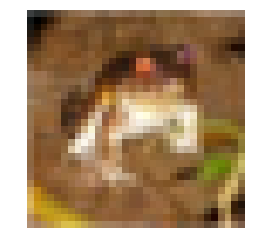

truck


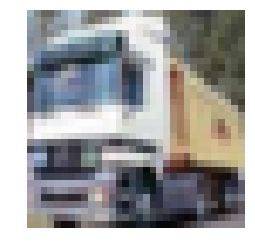

In [3]:
print("cat?")
plt.imshow(x_train[0])
plt.axis('off')
plt.show()
print("truck")
plt.imshow(x_train[1])
plt.axis("off")
plt.show()

In [4]:
#convert class label data to one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
#initialize the sequential model
model = Sequential()

model.add(Conv2D(32, 3, padding = 'same', input_shape = x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, 3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
#drop 20% of the feature maps
model.add(Dropout(0.25))


#-------------------------------------------
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


#--------------------------------------
#flattens feature maps to vector array
model.add(Flatten())

#each feature map now has 512 pixels
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))



#inintialize the optimizer, here we have root mean square error as cost function
ops = keras.optimizers.rmsprop(lr = 0.0001, decay  = 1e-6)

#compiles the network into C
model.compile(loss = 'categorical_crossentropy', 
             optimizer = ops,
             metrics = ['accuracy'])

#see the layer summary below
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        fill_mode='nearest',  # set mode for filling points outside the input boundaries
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        rescale=None,  # set rescaling factor (applied before any other transformation)
        preprocessing_function=None,  # set function that will be applied on each input
        data_format=None,  # image data format, either "channels_first" or "channels_last"
        validation_split=0.0)  # fraction of images reserved for validation (strictly between 0 an)

datagen.fit(x_train)

In [7]:
t = time.process_time()

model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                   epochs = epochs,
                   validation_data = (x_test, y_test) , workers = 4)

Epoch 1/22
1563/1563 [==============================] - 16s 11ms/step - loss: 1.8916 - acc: 0.3030 - val_loss: 1.5606 - val_acc: 0.4357
Epoch 2/22
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5933 - acc: 0.4195 - val_loss: 1.4038 - val_acc: 0.4917
Epoch 3/22
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4777 - acc: 0.4676 - val_loss: 1.3342 - val_acc: 0.5215
Epoch 4/22
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3862 - acc: 0.5024 - val_loss: 1.1986 - val_acc: 0.5757
Epoch 5/22
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3201 - acc: 0.5282 - val_loss: 1.1679 - val_acc: 0.5875
Epoch 6/22
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2612 - acc: 0.5496 - val_loss: 1.1136 - val_acc: 0.6099
Epoch 7/22
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2126 - acc: 0.5688 - val_loss: 1.1584 - val_acc: 0.5934
Epoch 8/22
1563/1563 [==============================] 

In [8]:
print("Elapsed Time: ", time.process_time()-t)

Elapsed Time:  1107.53125


In [9]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\harri\Documents\GitHub\ML-Notes\3. Deep Learning Notes\Keras Exercises\Keras Examples\saved_models\keras_cifar10_cnn.h5 


In [10]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss: ', scores[0])
print('Test accuracy: ', scores[1])

10000/10000 [==============================] - 1s 85us/step
Test loss: 0.7628070287704468
Test accuracy: 0.7364
